In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
%run Final_Merge.ipynb

C:\Users\Kim Dongyi\Documents\GitHub\utor-tor-data-pt-09-2020-u-c\Project-1---Crime-Demographics-and-City-Response\Data Cleaning


In [3]:
# Calculate the IQR and quantitatively determine if there are any potential outliers in Average Income.

# Calculate qualtiles and IQR
qualtiles = final_df['Average_Income'].quantile([0.25, 0.5, 0.75])

first_qualtile = qualtiles[0.25]
third_qualtile = qualtiles[0.75]

iqr = third_qualtile - first_qualtile

# Calculate lower bound and upper bound
lower_bound = first_qualtile - (1.5 * iqr)
upper_bound = third_qualtile + (1.5 * iqr)

# Determine outliers using upper and lower bounds
outlier_df = final_df.loc[(final_df['Average_Income'] > upper_bound) 
                                     | (final_df['Average_Income'] < lower_bound), :]

outlier_df

,Neighbourhood,Hood_ID,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Total Average Rate,Median_Income,Average_Income,Number of Starbucks Stores,Number of Red Lights,Speeding,Income Group
2,St.Andrew-Windfields,40,325.6,196.5,466.0,0.0,67.4,33.7,181.53,94271.0,189629.0,1,1,3,175-200K
15,Princess-Rosethorn,10,244.3,262.4,307.7,0.0,135.7,27.1,162.87,114844.0,174858.0,1,1,2,150-175K
35,Casa Loma,96,455.9,54.7,310.0,0.0,72.9,18.2,151.95,78152.0,175756.0,1,2,3,175-200K
37,Kingsway South,15,302.0,302.0,269.7,0.0,129.4,43.1,174.37,131047.0,226607.0,1,0,0,225-250K
39,Forest Hill South,101,242.3,186.4,326.1,0.0,149.1,37.3,156.87,78269.0,226031.0,2,1,12,225-250K
59,Rosedale-Moore Park,98,559.2,129.0,473.2,0.0,90.8,66.9,219.85,88855.0,233818.0,4,0,29,225-250K
99,Bedford Park-Nortown,39,266.8,284.0,383.0,0.0,64.6,77.5,179.32,90934.0,176139.0,2,1,0,175-200K
101,Bridle Path-Sunnybrook-York Mills,41,474.9,118.7,550.4,0.0,140.3,32.4,219.45,208674.0,481497.0,0,0,5,NaN
104,Lawrence Park South,103,197.6,184.5,382.1,0.0,85.6,52.7,150.42,127853.0,250437.0,2,1,10,250K+
112,Lawrence Park North,105,260.1,123.2,150.6,0.0,34.2,27.4,99.25,125667.0,188808.0,1,0,0,175-200K


In [4]:
# The final dataframe without outliers

outliers_removed_df = final_df.loc[(final_df['Average_Income'] <= upper_bound) & (final_df['Average_Income'] >= lower_bound), :]

outliers_removed_df

,Neighbourhood,Hood_ID,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Total Average Rate,Median_Income,Average_Income,Number of Starbucks Stores,Number of Red Lights,Speeding,Income Group
0,South Parkdale,85,1148.8,91.5,407.3,4.6,151.0,100.7,317.32,35601.0,46896.0,1,2,26,25-50K
1,South Riverdale,70,936.3,143.5,477.1,0.0,125.6,75.3,292.97,65076.0,83491.0,1,2,20,75-100K
3,Taylor-Massey,61,777.9,76.5,401.7,6.4,82.9,19.1,227.42,40915.0,51242.0,0,0,4,50-75K
4,Humber Summit,21,950.4,1087.3,459.1,24.2,225.5,177.2,487.28,57786.0,68431.0,0,3,23,50-75K
5,Humbermede,22,1035.7,437.4,392.4,0.0,173.7,51.5,348.45,51959.0,61290.0,0,0,8,50-75K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Humewood-Cedarvale,106,320.2,111.4,181.0,0.0,69.6,27.8,118.33,57140.0,92623.0,0,0,8,75-100K
136,Islington-City Centre West,14,504.9,391.2,282.0,2.3,79.6,84.2,224.03,66537.0,89289.0,8,7,45,75-100K
137,Danforth,66,786.3,72.4,413.8,0.0,186.2,41.4,250.02,69640.0,85379.0,1,0,6,75-100K
138,Rustic,28,593.5,372.2,140.8,10.1,30.2,10.1,192.82,43976.0,56844.0,0,1,0,50-75K


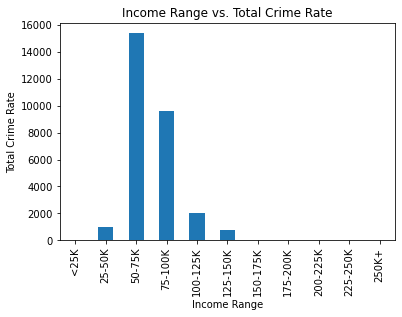

In [8]:
#Removed outlier
sorted_df = outliers_removed_df.sort_values("Average_Income")
df = sorted_df.groupby('Income Group')['Total Average Rate'].sum()
df.plot(kind='bar', x='Income Group', y='Total Average Rate')
plt.title("Income Range vs. Total Crime Rate")
plt.xlabel("Income Range")
plt.ylabel("Total Crime Rate")
plt.xticks(rotation=90)
plt.tight_layout
plt.show()

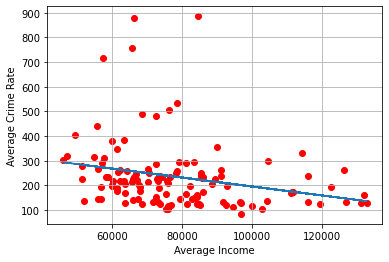

-0.257140955516672
0.0040897317614533675


In [35]:
## Creat linear regression plots 

income = outliers_removed_df["Average_Income"]
crime = outliers_removed_df["Total Average Rate"]

#plot
slope, int, r, p, std_err = st.linregress(income, crime)

#Create equation of line
eq_line = slope * income + int

plt.scatter(income, crime, color= 'red', label = 'actual data')
plt.plot(income, eq_line, '--')
plt.xlabel("Average Income")
plt.ylabel("Average Crime Rate")
plt.grid()
plt.show()

print(r)
print(p)

In [7]:
# Insights 
# There's a significant negative correlation between Average Crime Rate and Average Income
# Low Income area has higher crime rate
# R value -> negative relationship.
# p-value<0.005 -> A statistically significant test result